<a href="https://colab.research.google.com/github/ashura-code/Automating_stuff_with_python/blob/main/21BDS0292.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/income.csv"
data = pd.read_csv(url)

Dataset Shape: (8993, 19)

Column Names:
 Index(['SEX', 'MARITAL.STATUS', 'AGE', 'EDUCATION', 'OCCUPATION', 'AREA',
       'DUAL.INCOMES', 'HOUSEHOLD.SIZE', 'UNDER18', 'HOUSEHOLDER', 'HOME.TYPE',
       'ETHNIC.CLASS', 'LANGUAGE', 'income', 'EDUCATION_DESC',
       'OCCUPATION_DESC', 'MARITAL_STATUS_DESC', 'ETHNIC_CLASS_DESC',
       'SEX_DESC'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   SEX                  8993 non-null   category
 1   MARITAL.STATUS       7863 non-null   category
 2   AGE                  8993 non-null   float64 
 3   EDUCATION            7677 non-null   category
 4   OCCUPATION           6753 non-null   category
 5   AREA                 8080 non-null   object  
 6   DUAL.INCOMES         8993 non-null   object  
 7   HOUSEHOLD.SIZE       8618 non-null   object

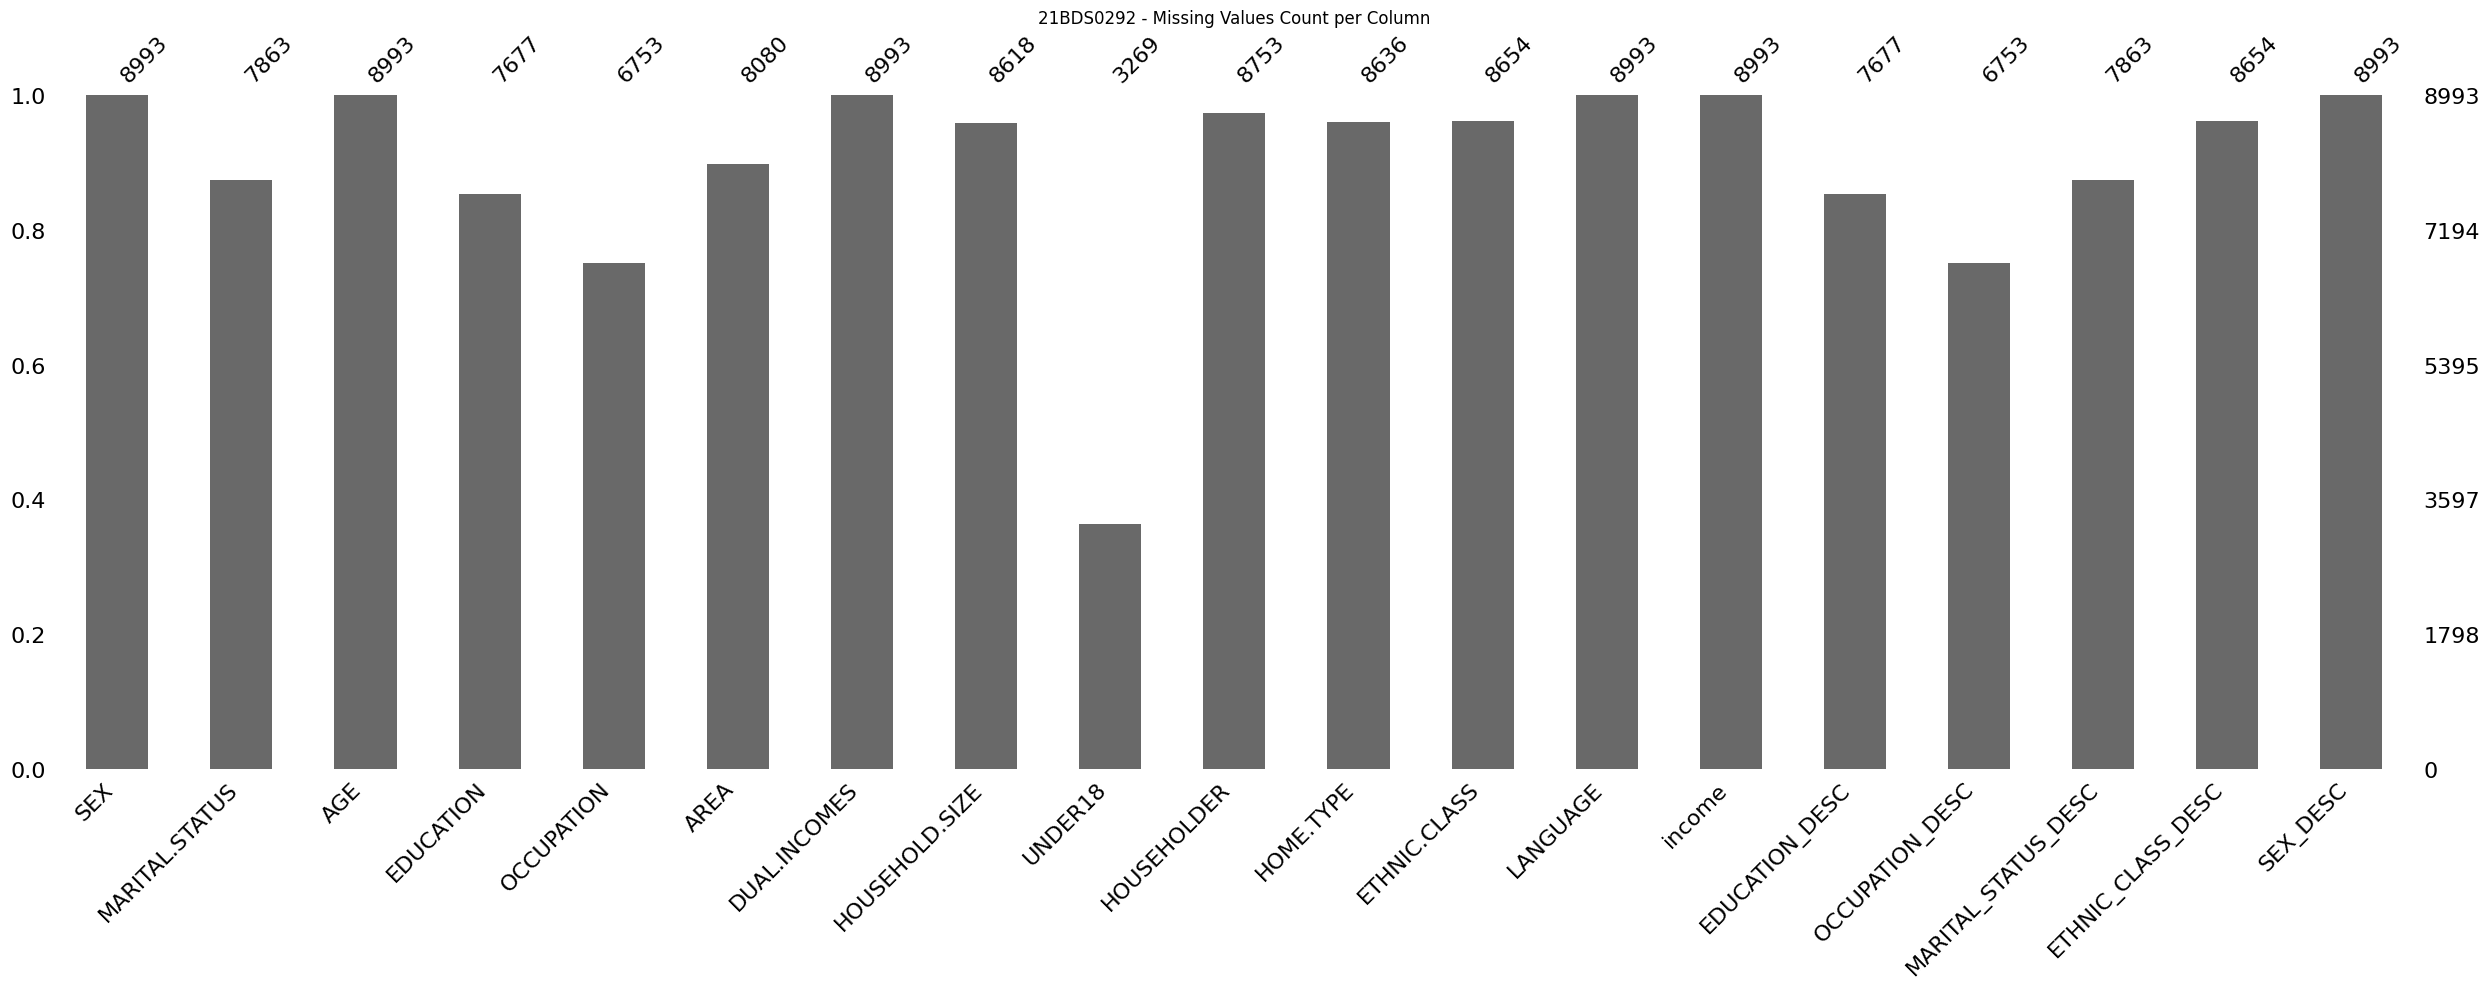

In [68]:
# Explore the dataset
print("Dataset Shape:", data.shape)   # Number of rows and columns
print("\nColumn Names:\n", data.columns)  # Column names
print("\nDataset Info:")
print(data.info())  # Structure of dataset
print("\nSummary Statistics:\n", data.describe())  # Summary statistics

# View first and last 3 rows
print("\nFirst 3 Rows:\n", data.head(3))
print("\nLast 3 Rows:\n", data.tail(3))

# Checking missing values
print("\nAre there any missing values? ", data.isnull().values.any())
print("\nMissing Values Per Column:\n", data.isnull().sum())

# Visualizing missing values
msno.bar(data)  # Bar chart of missing values
plt.title("21BDS0292 - Missing Values Count per Column")
plt.tight_layout()
plt.show()



In [62]:
#CLeaning data using regular expressions

import pandas as pd
import numpy as np

# Clean special characters (remove all brackets and parentheses)
data['INCOME'] = data['INCOME'].str.replace(r'[\[\]()]', '', regex=True)

# Split into lower/upper bounds using regex to capture numerical ranges
income_split = data['INCOME'].str.extract(r'(\d+\.?\d*)\s*-\s*(\d+\.?\d*)|-?(\d+\.?\d*)')

# Handle split cases: ranges vs single values
data['income_lower'] = income_split[0].fillna(income_split[2])  # Ranges start or single values
data['income_upper'] = income_split[1].fillna(income_split[2])  # Ranges end or same as single

# Convert to numeric and handle negative values
data['income_lower'] = pd.to_numeric(data['income_lower'], errors='coerce').abs()
data['income_upper'] = pd.to_numeric(data['income_upper'], errors='coerce').abs()

# For entries with no upper bound (e.g., "75.000-"), set upper = lower
data['income_upper'].fillna(data['income_lower'], inplace=True)

# Calculate midpoint for analysis
data['income'] = (data['income_lower'] + data['income_upper']) / 2

# Find the most spoken language
most_spoken_language = data['LANGUAGE'].value_counts().index[0]

# Replace NaN values in LANGUAGE with the most spoken language
data['LANGUAGE'].fillna(most_spoken_language, inplace=True)

# Define age ranges and their midpoints
age_ranges = {
    '14-17': 15.5,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65+': 67.5  # assuming 67.5 as the midpoint for 65+
}

# Replace age ranges with their midpoints
data['AGE'] = data['AGE'].map(age_ranges)

# Define education levels
education_levels = {
    'Grades 9 to 11': 1,
    'Graduated High Scool': 2,
    '1 to 3 years of college': 3,
    'College graduate': 4
}

# Map education levels to the EDUCATION column
data['EDUCATION'] = data['EDUCATION'].map(education_levels)

# Convert EDUCATION to categorical with ordered levels
data['EDUCATION'] = pd.Categorical(data['EDUCATION'],
                                   categories=[1, 2, 3, 4],
                                   ordered=True)

# Map education levels to their descriptions
education_descriptions = {
    1: 'Grades 9 to 11',
    2: 'Graduated High Scool',
    3: '1 to 3 years of college',
    4: 'College graduate'
}

# Map education descriptions to the EDUCATION column
data['EDUCATION_DESC'] = data['EDUCATION'].map(education_descriptions)

# Define occupation levels
occupation_levels = {
    'Homemaker': 1,
    'Professional/Managerial': 2,
    'Student, HS or College': 3,
    'Unemployed': 4,
    'Factory Worker/Laborer/Driver': 5,
    'Retired': 6
}

# Map occupation levels to the OCCUPATION column
data['OCCUPATION'] = data['OCCUPATION'].map(occupation_levels)

# Convert OCCUPATION to categorical with ordered levels
data['OCCUPATION'] = pd.Categorical(data['OCCUPATION'],
                                    categories=[1, 2, 3, 4, 5, 6],
                                    ordered=True)

# Map occupation levels to their descriptions
occupation_descriptions = {
    1: 'Homemaker',
    2: 'Professional/Managerial',
    3: 'Student, HS or College',
    4: 'Unemployed',
    5: 'Factory Worker/Laborer/Driver',
    6: 'Retired'
}

# Map occupation descriptions to the OCCUPATION column
data['OCCUPATION_DESC'] = data['OCCUPATION'].map(occupation_descriptions)

# Define marital status levels
marital_status_levels = {
    'Married': 1,
    'Single': 2,
    'Divorced': 3
}

# Map marital status levels to the MARITAL.STATUS column
data['MARITAL.STATUS'] = data['MARITAL.STATUS'].map(marital_status_levels)

# Convert MARITAL.STATUS to categorical with ordered levels
data['MARITAL.STATUS'] = pd.Categorical(data['MARITAL.STATUS'],
                                        categories=[1, 2, 3],
                                        ordered=True)

# Map marital status levels to their descriptions
marital_status_descriptions = {
    1: 'Married',
    2: 'Single',
    3: 'Divorced'
}

# Map marital status descriptions to the MARITAL.STATUS column
data['MARITAL_STATUS_DESC'] = data['MARITAL.STATUS'].map(marital_status_descriptions)

# Define ethnic class levels
ethnic_class_levels = {
    'White': 1,
    'Black': 2,
    'Asian': 3,
    'Hispanic': 4,
    'Other': 5
}

# Map ethnic class levels to the ETHNIC.CLASS column
data['ETHNIC.CLASS'] = data['ETHNIC.CLASS'].map(ethnic_class_levels)

# Convert ETHNIC.CLASS to categorical with ordered levels
data['ETHNIC.CLASS'] = pd.Categorical(data['ETHNIC.CLASS'],
                                      categories=[1, 2, 3, 4, 5],
                                      ordered=True)

# Map ethnic class levels to their descriptions
ethnic_class_descriptions = {
    1: 'White',
    2: 'Black',
    3: 'Asian',
    4: 'Hispanic',
    5: 'Other'
}

# Map ethnic class descriptions to the ETHNIC.CLASS column
data['ETHNIC_CLASS_DESC'] = data['ETHNIC.CLASS'].map(ethnic_class_descriptions)

# Define sex levels
sex_levels = {
    'F': 1,
    'M': 2
}

# Map sex levels to the SEX column
data['SEX'] = data['SEX'].map(sex_levels)

# Convert SEX to categorical with ordered levels
data['SEX'] = pd.Categorical(data['SEX'],
                             categories=[1, 2],
                             ordered=True)

# Map sex levels to their descriptions
sex_descriptions = {
    1: 'Female',
    2: 'Male'
}

# Map sex descriptions to the SEX column
data['SEX_DESC'] = data['SEX'].map(sex_descriptions)

# Optional: Drop intermediate columns
data.drop(['INCOME', 'income_lower', 'income_upper'], axis=1, inplace=True)

<ipython-input-62-5bb641ea510f>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['income_upper'].fillna(data['income_lower'], inplace=True)
<ipython-input-62-5bb641ea510f>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [63]:
data.head()

,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE,income,EDUCATION_DESC,OCCUPATION_DESC,MARITAL_STATUS_DESC,ETHNIC_CLASS_DESC,SEX_DESC
0,1,1,49.5,3,1,10+ years,No,Three,NaN,Own,House,1,English,75.0,1 to 3 years of college,Homemaker,Married,White,Female
1,2,1,49.5,4,1,10+ years,No,Five,Two,Own,House,1,English,75.0,College graduate,Homemaker,Married,White,Male
2,1,1,29.5,4,2,10+ years,Yes,Three,One,Rent,Apartment,1,English,75.0,College graduate,Professional/Managerial,Married,White,Female
3,1,2,15.5,1,3,10+ years,Not Married,Four,Two,Family,House,1,English,10.0,Grades 9 to 11,"Student, HS or College",Single,White,Female
4,1,2,15.5,1,3,4-6 years,Not Married,Four,Two,Family,House,1,English,10.0,Grades 9 to 11,"Student, HS or College",Single,White,Female


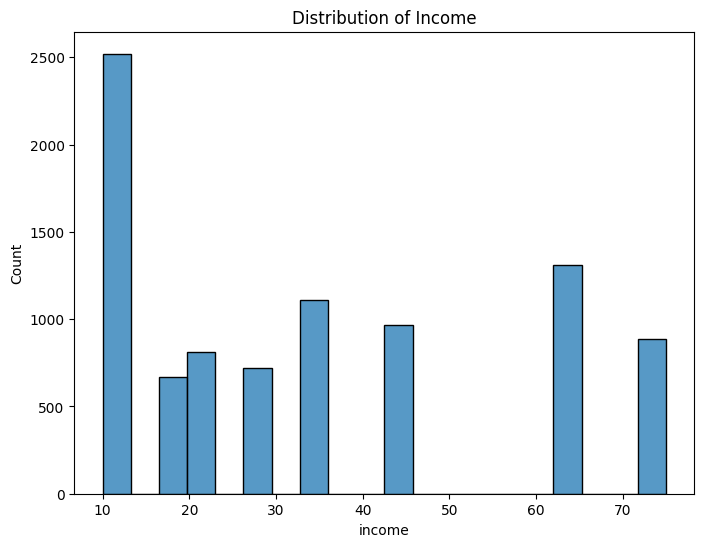

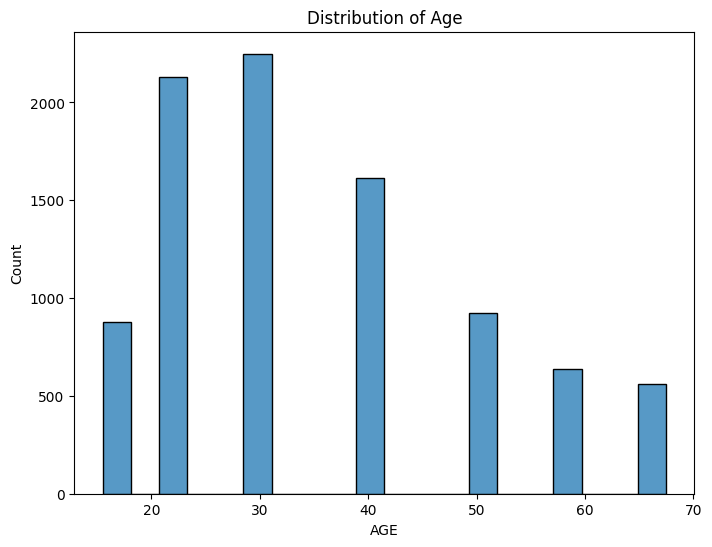

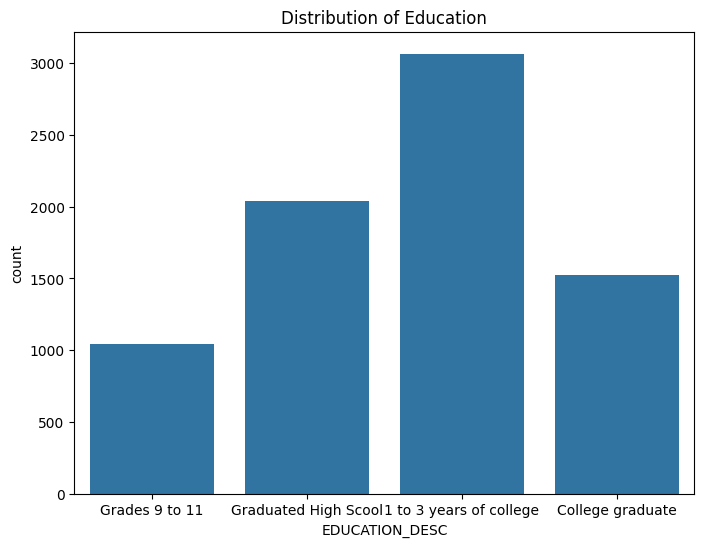

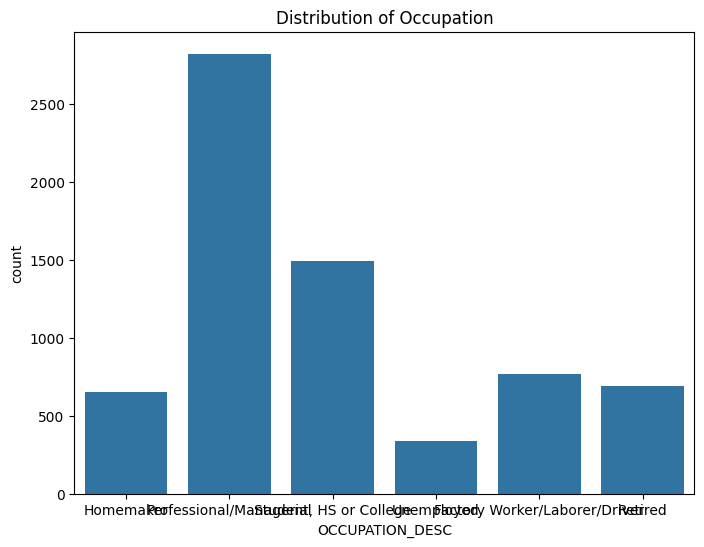

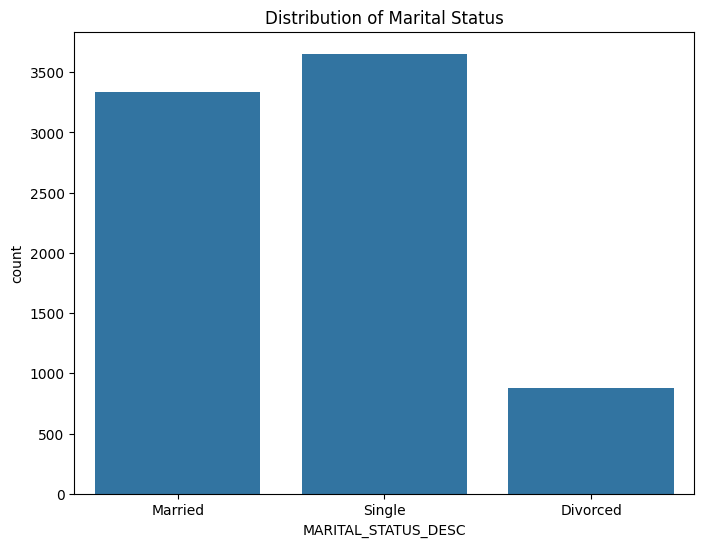

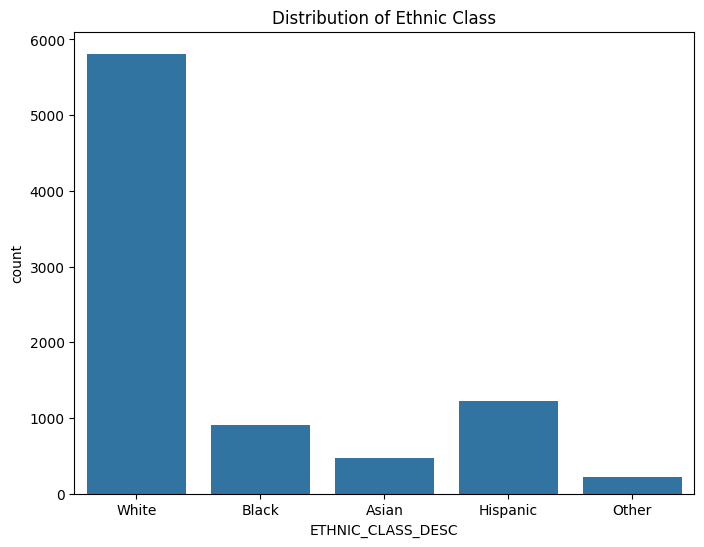

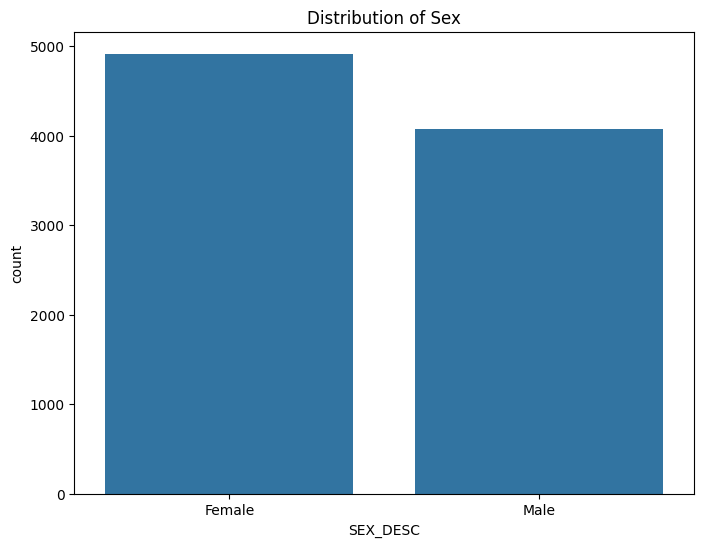

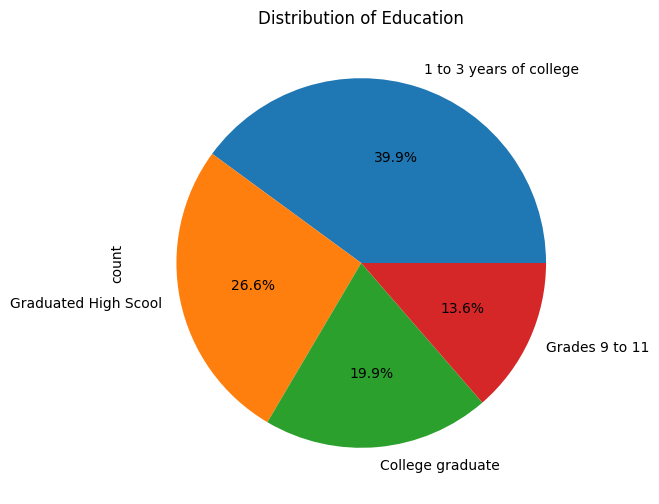

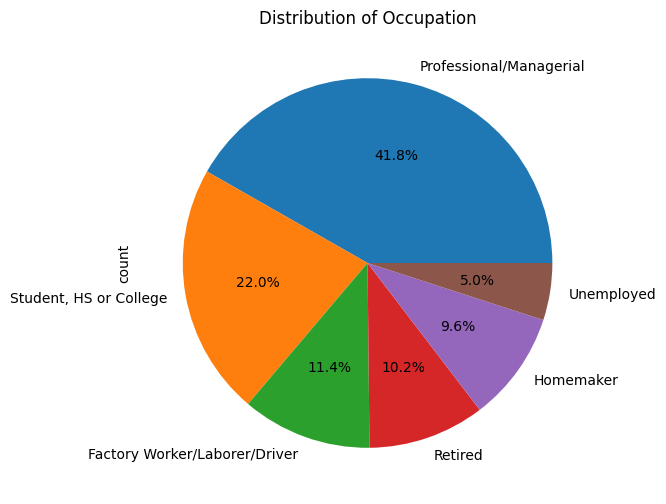

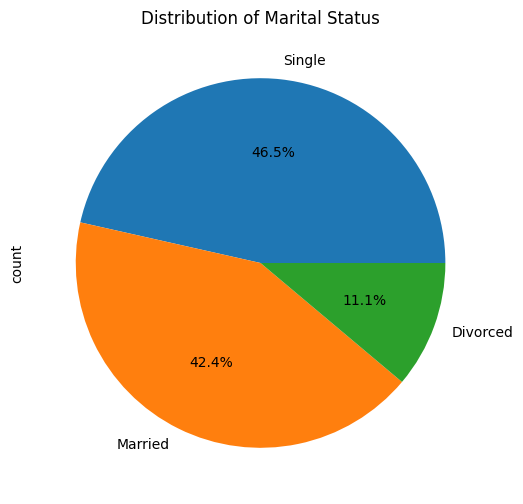

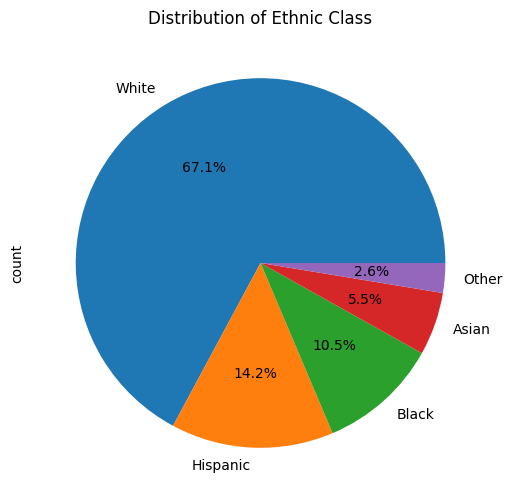

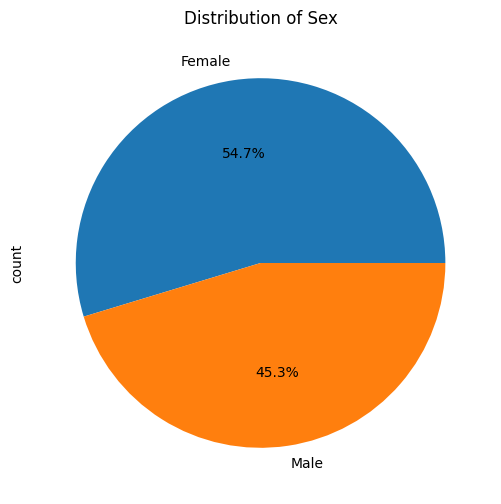

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for income
plt.figure(figsize=(8,6))
sns.histplot(data['income'], bins=20)
plt.title('Distribution of Income')
plt.show()

# Histogram for age
plt.figure(figsize=(8,6))
sns.histplot(data['AGE'], bins=20)
plt.title('Distribution of Age')
plt.show()

# Bar chart for education
plt.figure(figsize=(8,6))
sns.countplot(x='EDUCATION_DESC', data=data)
plt.title('Distribution of Education')
plt.show()

# Bar chart for occupation
plt.figure(figsize=(8,6))
sns.countplot(x='OCCUPATION_DESC', data=data)
plt.title('Distribution of Occupation')
plt.show()

# Bar chart for marital status
plt.figure(figsize=(8,6))
sns.countplot(x='MARITAL_STATUS_DESC', data=data)
plt.title('Distribution of Marital Status')
plt.show()

# Bar chart for ethnic class
plt.figure(figsize=(8,6))
sns.countplot(x='ETHNIC_CLASS_DESC', data=data)
plt.title('Distribution of Ethnic Class')
plt.show()

# Bar chart for sex
plt.figure(figsize=(8,6))
sns.countplot(x='SEX_DESC', data=data)
plt.title('Distribution of Sex')
plt.show()

# Pie chart for education
plt.figure(figsize=(8,6))
data['EDUCATION_DESC'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Education')
plt.show()

# Pie chart for occupation
plt.figure(figsize=(8,6))
data['OCCUPATION_DESC'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Occupation')
plt.show()

# Pie chart for marital status
plt.figure(figsize=(8,6))
data['MARITAL_STATUS_DESC'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.show()

# Pie chart for ethnic class
plt.figure(figsize=(8,6))
data['ETHNIC_CLASS_DESC'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ethnic Class')
plt.show()

# Pie chart for sex
plt.figure(figsize=(8,6))
data['SEX_DESC'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

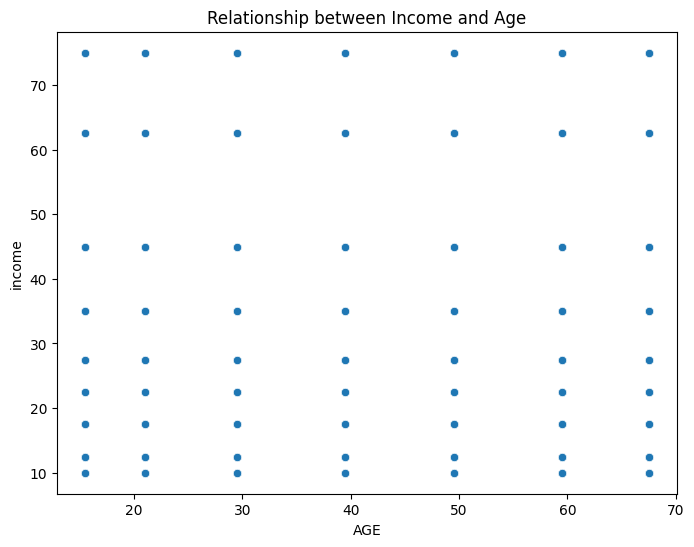

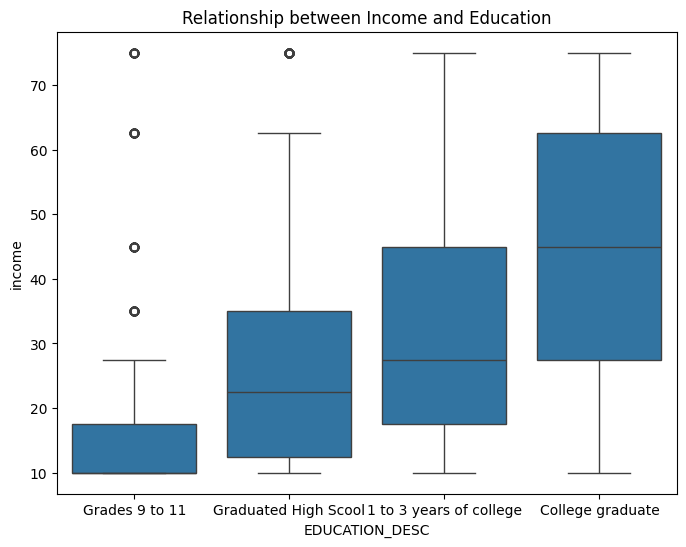

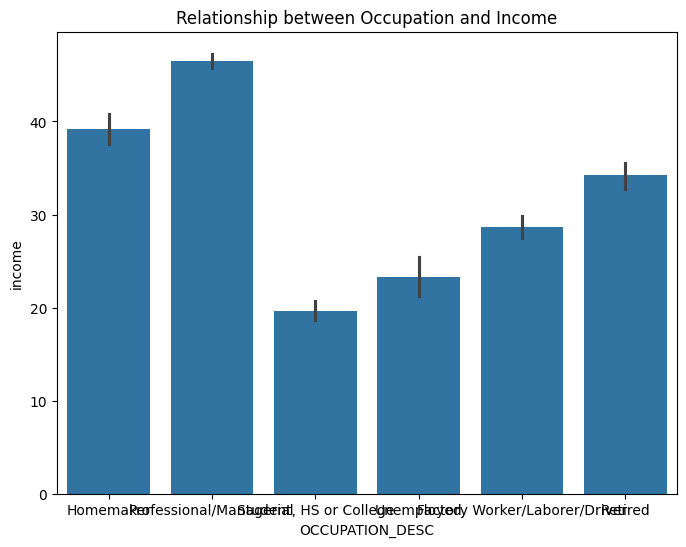

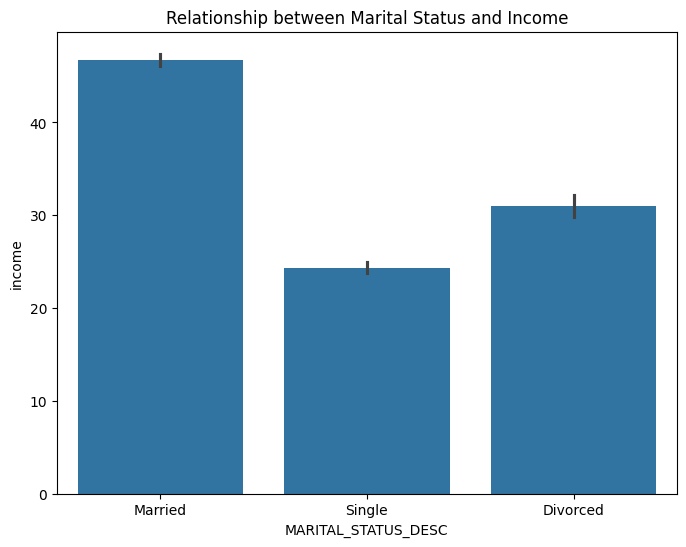

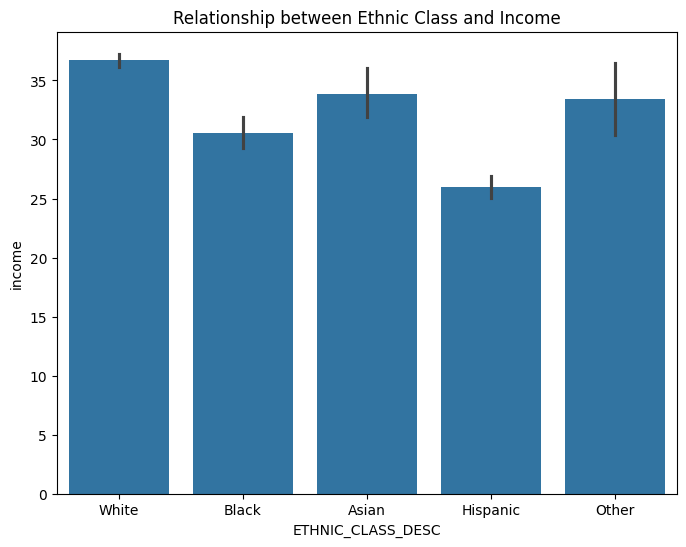

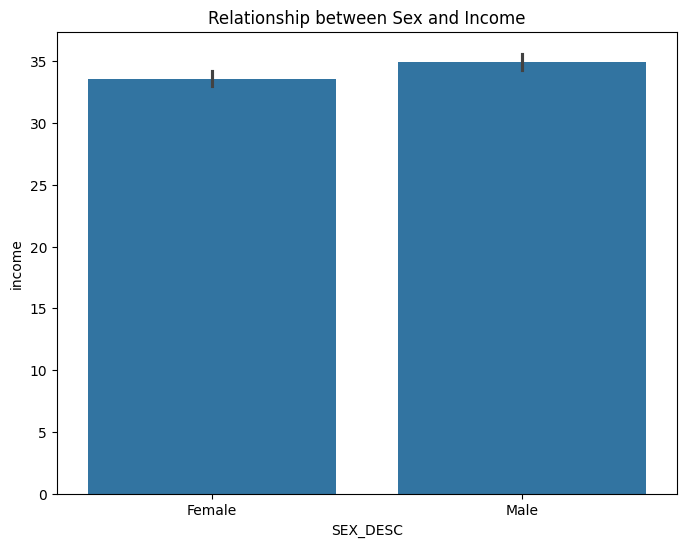

In [65]:
# Scatter plot for income vs age
plt.figure(figsize=(8,6))
sns.scatterplot(x='AGE', y='income', data=data)
plt.title('Relationship between Income and Age')
plt.show()

# Box plot for income vs education
plt.figure(figsize=(8,6))
sns.boxplot(x='EDUCATION_DESC', y='income', data=data)
plt.title('Relationship between Income and Education')
plt.show()

# Bar chart for occupation vs income
plt.figure(figsize=(8,6))
sns.barplot(x='OCCUPATION_DESC', y='income', data=data)
plt.title('Relationship between Occupation and Income')
plt.show()

# Bar chart for marital status vs income
plt.figure(figsize=(8,6))
sns.barplot(x='MARITAL_STATUS_DESC', y='income', data=data)
plt.title('Relationship between Marital Status and Income')
plt.show()

# Bar chart for ethnic class vs income
plt.figure(figsize=(8,6))
sns.barplot(x='ETHNIC_CLASS_DESC', y='income', data=data)
plt.title('Relationship between Ethnic Class and Income')
plt.show()

# Bar chart for sex vs income
plt.figure(figsize=(8,6))
sns.barplot(x='SEX_DESC', y='income', data=data)
plt.title('Relationship between Sex and Income')
plt.show()

<Figure size 1000x800 with 0 Axes>

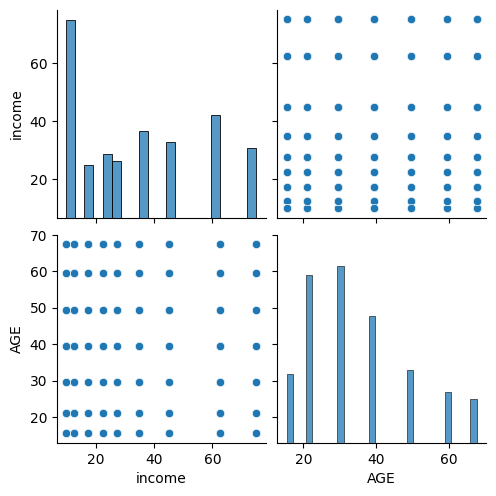

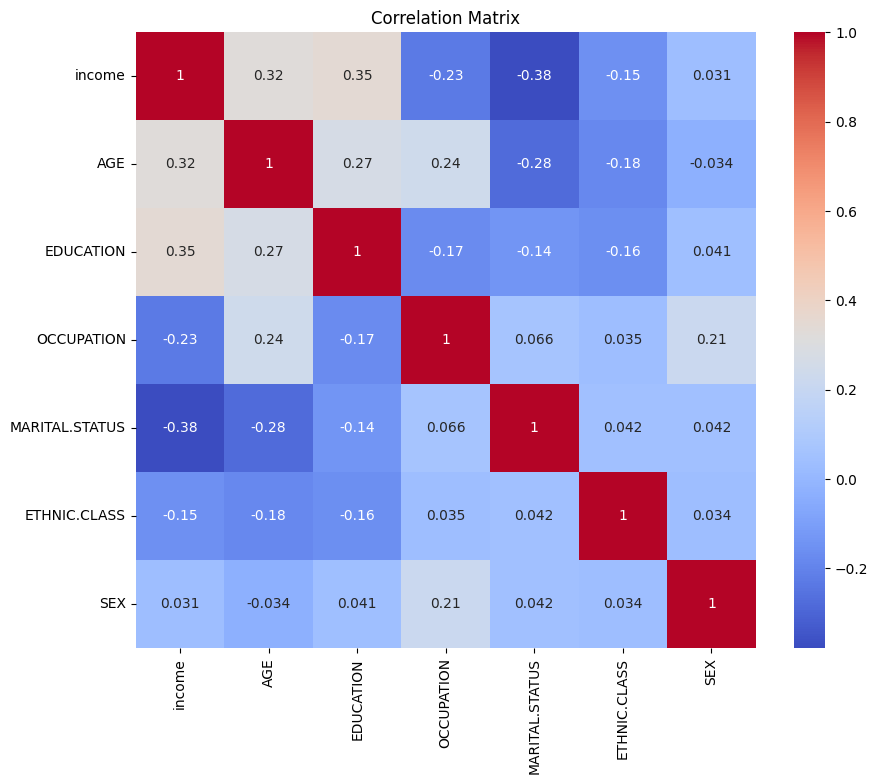

In [66]:
# Pairplot for all variables
plt.figure(figsize=(10,8))
sns.pairplot(data[['income', 'AGE', 'EDUCATION', 'OCCUPATION', 'MARITAL.STATUS', 'ETHNIC.CLASS', 'SEX']])
plt.show()

# Heatmap for correlation matrix
corr_matrix = data[['income', 'AGE', 'EDUCATION', 'OCCUPATION', 'MARITAL.STATUS', 'ETHNIC.CLASS', 'SEX']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()